# Code for plotting figure 7, sensitivity test on capacity expansion plans
Developed by Siobhan Powell, 2022.

In [1]:
import os
os.chdir('..')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
# Emissions
df_em = pd.DataFrame(np.zeros((4, 9)), columns=['MoreCoal', 'MoreGas', 'MoreSolar', 'MoreWind', 'LessCoal', 'LessGas', 'LessSolar', 'LessWind', 'BaseGrid'], 
                      index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'])
df_stor = pd.DataFrame(np.zeros((4, 9)), columns=['MoreCoal', 'MoreGas', 'MoreSolar', 'MoreWind', 'LessCoal', 'LessGas', 'LessSolar', 'LessWind', 'BaseGrid'], 
                      index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'])
df_ramp = pd.DataFrame(np.zeros((4, 9)), columns=['MoreCoal', 'MoreGas', 'MoreSolar', 'MoreWind', 'LessCoal', 'LessGas', 'LessSolar', 'LessWind', 'BaseGrid'], 
                      index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'])
df_overgen = pd.DataFrame(np.zeros((4, 9)), columns=['MoreCoal', 'MoreGas', 'MoreSolar', 'MoreWind', 'LessCoal', 'LessGas', 'LessSolar', 'LessWind', 'BaseGrid'], 
                      index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'])

solar=3.5
wind=3
for ev_scenario in ['HighHome', 'UniversalHome', 'LowHome_HighWork', 'LowHome_LowWork']:
    # Changing Grid by 10%
    for sens_string, sens_index in {'gasUP10p':'MoreGas', 'gasDOWN10p':'LessGas', 'coalUP10p':'MoreCoal', 'coalDOWN10p':'LessCoal',
                                   'solarUP10p':'MoreSolar', 'solarDOWN10p':'LessSolar', 'windUP10p':'MoreWind', 'windDOWN10p':'LessWind'}.items():               
        noev_here = pd.read_csv('Results/GridExpansionSensitivity/NoEVs_2035_'+sens_string+'_withstorage_dpdf_20220408.csv')
        dpdf = pd.read_csv('Results/GridExpansionSensitivity/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel0.5_'+sens_string+'_withstorage_dpdf_20220408.csv')
        df_em.loc[ev_scenario, sens_index] = 0.2 * (dpdf.co2_tot.sum()  - noev_here.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_here.total_incl_noncombustion.sum())
        stor = pd.read_csv('Results/GridExpansionSensitivity/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel0.5_'+sens_string+'_storage_stats_20220408.csv')
        df_stor.loc[ev_scenario, sens_index] = stor['Storage Rate Result'].values[0]
        
        dpdf_ramping = pd.read_csv('Results/GridExpansionSensitivity/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel0.5_'+sens_string+'_futuredemand_storagebefore_afterstorage_20220408.csv')
        prof1 = np.zeros((25, ))
        prof1[np.arange(0, 24)] = dpdf_ramping['demand'].values.reshape(-1, 24).mean(axis=0)
        prof1[24] = prof1[0]
        df_ramp.loc[ev_scenario, sens_index] = np.max(prof1[1:] - prof1[:-1])
        overgen = pd.read_csv('Results/GridExpansionSensitivity/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel0.5_'+sens_string+'_overgeneration_afterstorage.csv')
        df_overgen.loc[ev_scenario, sens_index] = np.abs(overgen.demand.sum())
        
    # Base Grid
    noev_here = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')
    dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel0.5_withstorage_dpdf_20220408.csv')
    df_em.loc[ev_scenario, 'BaseGrid'] = 0.2 * (dpdf.co2_tot.sum()  - noev_here.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_here.total_incl_noncombustion.sum())
    stor = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel0.5_storage_stats_20220408.csv')
    df_stor.loc[ev_scenario, 'BaseGrid'] = stor['Storage Rate Result'].values[0]

    dpdf_ramping = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel0.5_storagebefore_withstorage_dpdf_20220408.csv')
    prof1 = np.zeros((25, ))
    prof1[np.arange(0, 24)] = dpdf_ramping['demand'].values.reshape(-1, 24).mean(axis=0)
    prof1[24] = prof1[0]
    df_ramp.loc[ev_scenario, 'BaseGrid'] = np.max(prof1[1:] - prof1[:-1])
    overgen = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel0.5_storagebefore_overgeneration_afterstorage.csv')
    df_overgen.loc[ev_scenario, 'BaseGrid'] = np.abs(overgen.demand.sum())


In [5]:
df_em

,MoreCoal,MoreGas,MoreSolar,MoreWind,LessCoal,LessGas,LessSolar,LessWind,BaseGrid
UniversalHome,94.389162,93.119911,93.070306,93.503130,94.552756,94.552756,95.995138,95.837461,94.552756
HighHome,91.780298,90.839049,89.447170,90.592294,91.800523,91.800523,93.628498,93.170188,91.800523
LowHome_HighWork,89.147550,88.428381,85.689574,87.589447,88.969788,88.969788,91.657473,90.422817,88.969788
LowHome_LowWork,89.299964,88.534223,85.907347,87.777181,89.122514,89.122514,91.717556,90.561250,89.122514


In [6]:
df_stor

,MoreCoal,MoreGas,MoreSolar,MoreWind,LessCoal,LessGas,LessSolar,LessWind,BaseGrid
UniversalHome,0.0,0.0,6995.0,5808.0,7152.0,7152.0,7310.0,8497.0,7152.0
HighHome,0.0,0.0,5044.0,4209.0,5450.0,5450.0,5855.0,6691.0,5450.0
LowHome_HighWork,0.0,0.0,3825.0,2989.0,4230.0,4230.0,4636.0,5471.0,4230.0
LowHome_LowWork,0.0,0.0,3969.0,3133.0,4374.0,4374.0,4779.0,5615.0,4374.0


In [7]:
df_ramp

,MoreCoal,MoreGas,MoreSolar,MoreWind,LessCoal,LessGas,LessSolar,LessWind,BaseGrid
UniversalHome,9690.595279,9690.595279,10718.817730,9398.915123,9690.595279,9690.595279,8496.449438,9943.721122,9690.595279
HighHome,8391.492005,8391.492005,9502.996738,8101.211394,8391.492005,8391.492005,7109.795884,8634.051110,8391.492005
LowHome_HighWork,6418.507422,6418.507422,7641.135261,6154.537861,6418.507422,6418.507422,5102.589429,6652.043109,6418.507422
LowHome_LowWork,6685.212844,6685.212844,7903.614813,6425.344835,6685.212844,6685.212844,5351.787217,6918.519951,6685.212844


In [8]:
df_overgen

,MoreCoal,MoreGas,MoreSolar,MoreWind,LessCoal,LessGas,LessSolar,LessWind,BaseGrid
UniversalHome,1.685107e+06,1.685107e+06,3.544669e+06,2.512815e+06,1.685107e+06,1.685107e+06,617278.277872,980841.855611,1.685107e+06
HighHome,1.230385e+06,1.230385e+06,2.819869e+06,1.962831e+06,1.230385e+06,1.230385e+06,422709.919145,724015.348376,1.230385e+06
LowHome_HighWork,9.652986e+05,9.652986e+05,2.185581e+06,1.531559e+06,9.652986e+05,9.652986e+05,253750.384453,504958.183711,9.652986e+05
LowHome_LowWork,9.516418e+05,9.516418e+05,2.190500e+06,1.515723e+06,9.516418e+05,9.516418e+05,253129.896681,493017.330960,9.516418e+05


In [25]:
# df_em.loc['UniversalHome', 'MoreGas'] = 80
# df_em['MoreCoal'] = [130, 120]
# df_em['MoreSolar'] = [75, 70]
# df_em['MoreWind'] = [65, 60]

Note: so far run is without storage

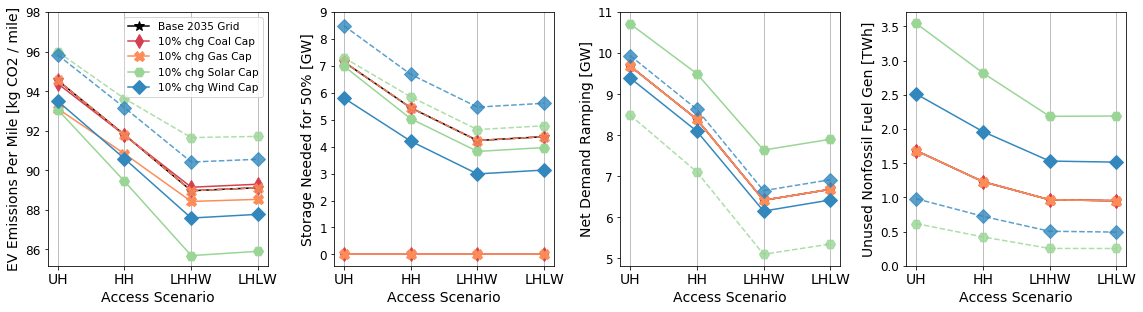

In [9]:
markers = ['d', 'X', 'H', 'D']
colors=['#d53e4f', '#fc8d59', '#99d594', '#3288bd']
# colors = ['#d7191c', '#fdae61', '#abdda4', '#2b83ba']
scaling = [1, (1/1000), (1/1000), (1/1000)*(1/1000)]
fig, axes = plt.subplots(1, 4, figsize=(16, 4.5))
for k, df_plot in enumerate([df_em, df_stor, df_ramp, df_overgen]):
    axes[k].plot(np.arange(0, 4), scaling[k]*df_plot['BaseGrid'].values, '-*', color='k', markersize=10, label='Base 2035 Grid')
    for i, col in enumerate(['Coal', 'Gas', 'Solar', 'Wind']):#df_em.columns):
        axes[k].plot(np.arange(0, 4), scaling[k]*df_plot['More'+col].values, '-'+markers[i], color=colors[i], markersize=10, label='10% chg '+col+' Cap')
        axes[k].plot(np.arange(0, 4), scaling[k]*df_plot['Less'+col].values, '--'+markers[i], color=colors[i], alpha=0.8, markersize=10)
    
for j in range(4):
    axes[j].set_xticks([0, 1, 2, 3])
    axes[j].set_xticklabels(['UH', 'HH', 'LHHW', 'LHLW'], fontsize=14)
# plt.yticks(fontsize=14)
    axes[j].grid(axis='x')
    axes[j].set_xlabel('Access Scenario', fontsize=14)
axes[0].set_ylabel('EV Emissions Per Mile [kg CO2 / mile]', fontsize=14)
axes[0].legend(fontsize=10.5)
axes[0].set_yticks(np.arange(86, 99, 2))
axes[0].set_yticklabels(np.arange(86, 99, 2), fontsize=12)
axes[1].set_yticks(np.arange(0, 10, 1))
axes[1].set_yticklabels(np.arange(0, 10, 1), fontsize=12)
axes[2].set_yticks(np.arange(5, 12))
axes[2].set_yticklabels(np.arange(5, 12), fontsize=12)
axes[3].set_yticks(np.arange(0, 3.6, 0.5))
axes[3].set_yticklabels(np.arange(0, 3.6, 0.5), fontsize=12)
# for i, col in enumerate(['Coal', 'Gas', 'Solar', 'Wind']):
#     plt.plot(np.arange(0, 4), df_stor['More'+col].values, '-'+markers[i], color=colors[i], markersize=10, label='10% chg '+col+' Cap')
#     plt.plot(np.arange(0, 4), df_stor['Less'+col].values, '--'+markers[i], color=colors[i], alpha=0.8, markersize=10)
# plt.xticks([0, 1, 2, 3], ['Universal Home', 'High Home', 'LHHW', 'LHLW'], fontsize=12)
# plt.yticks(fontsize=14)
# plt.grid(axis='x')
axes[1].set_ylabel('Storage Needed for 50% [GW]', fontsize=14)
axes[2].set_ylabel('Net Demand Ramping [GW]', fontsize=14)
axes[3].set_ylabel('Unused Nonfossil Fuel Gen [TWh]', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/figure7_v3_sensitivity_2035.pdf', bbox_inches='tight')
plt.show()

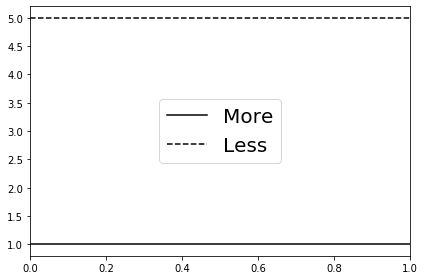

In [25]:
plt.figure()
plt.axhline(1, label='More', linestyle='-', color='k')
plt.axhline(5, label='Less', linestyle='--', color='k')
plt.legend(fontsize=20, loc='center')
plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig7_v2_sensitivity_legend2.pdf', bbox_inches='tight')
plt.show()

# 100% vs 50%

In [6]:
# Emissions
df_em_100p = pd.DataFrame(np.zeros((4, 9)), columns=['MoreCoal', 'MoreGas', 'MoreSolar', 'MoreWind', 'LessCoal', 'LessGas', 'LessSolar', 'LessWind', 'BaseGrid'], 
                      index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'])
df_stor_100p = pd.DataFrame(np.zeros((4, 9)), columns=['MoreCoal', 'MoreGas', 'MoreSolar', 'MoreWind', 'LessCoal', 'LessGas', 'LessSolar', 'LessWind', 'BaseGrid'], 
                      index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'])
df_ramp_100p = pd.DataFrame(np.zeros((4, 9)), columns=['MoreCoal', 'MoreGas', 'MoreSolar', 'MoreWind', 'LessCoal', 'LessGas', 'LessSolar', 'LessWind', 'BaseGrid'], 
                      index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'])
df_overgen_100p = pd.DataFrame(np.zeros((4, 9)), columns=['MoreCoal', 'MoreGas', 'MoreSolar', 'MoreWind', 'LessCoal', 'LessGas', 'LessSolar', 'LessWind', 'BaseGrid'], 
                      index=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork'])

solar=3.5
wind=3
for ev_scenario in ['HighHome', 'UniversalHome', 'LowHome_HighWork', 'LowHome_LowWork']:
    # Changing Grid by 10%
    for sens_string, sens_index in {'gasUP10p':'MoreGas', 'gasDOWN10p':'LessGas', 'coalUP10p':'MoreCoal', 'coalDOWN10p':'LessCoal',
                                   'solarUP10p':'MoreSolar', 'solarDOWN10p':'LessSolar', 'windUP10p':'MoreWind', 'windDOWN10p':'LessWind'}.items():               
        noev_here = pd.read_csv('Results/GridExpansionSensitivity/NoEVs_2035_'+sens_string+'_withstorage_dpdf_20220408.csv')
        dpdf = pd.read_csv('Results/GridExpansionSensitivity/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel1.0_'+sens_string+'_withstorage_dpdf_20220408.csv')
        df_em_100p.loc[ev_scenario, sens_index] = 0.2 * (dpdf.co2_tot.sum()  - noev_here.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_here.total_incl_noncombustion.sum())
        stor = pd.read_csv('Results/GridExpansionSensitivity/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel1.0_'+sens_string+'_storage_stats_20220408.csv')
        df_stor_100p.loc[ev_scenario, sens_index] = stor['Storage Rate Result'].values[0]
        
        dpdf_ramping = pd.read_csv('Results/GridExpansionSensitivity/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel1.0_'+sens_string+'_futuredemand_storagebefore_afterstorage_20220408.csv')
        prof1 = np.zeros((25, ))
        prof1[np.arange(0, 24)] = dpdf_ramping['demand'].values.reshape(-1, 24).mean(axis=0)
        prof1[24] = prof1[0]
        df_ramp_100p.loc[ev_scenario, sens_index] = np.max(prof1[1:] - prof1[:-1])
        overgen = pd.read_csv('Results/GridExpansionSensitivity/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel1.0_'+sens_string+'_overgeneration_afterstorage.csv')
        df_overgen_100p.loc[ev_scenario, sens_index] = np.abs(overgen.demand.sum())
        
    # Base Grid
    noev_here = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')
    dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel1.0_withstorage_dpdf_20220408.csv')
    df_em_100p.loc[ev_scenario, 'BaseGrid'] = 0.2 * (dpdf.co2_tot.sum()  - noev_here.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_here.total_incl_noncombustion.sum())
    stor = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel1.0_storage_stats_20220408.csv')
    df_stor_100p.loc[ev_scenario, 'BaseGrid'] = stor['Storage Rate Result'].values[0]

    dpdf_ramping = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel1.0_storagebefore_withstorage_dpdf_20220408.csv')
    prof1 = np.zeros((25, ))
    prof1[np.arange(0, 24)] = dpdf_ramping['demand'].values.reshape(-1, 24).mean(axis=0)
    prof1[24] = prof1[0]
    df_ramp_100p.loc[ev_scenario, 'BaseGrid'] = np.max(prof1[1:] - prof1[:-1])
    overgen = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+ev_scenario+'_TimersNone_noWPcontrol_penlevel1.0_storagebefore_overgeneration_afterstorage.csv')
    df_overgen_100p.loc[ev_scenario, 'BaseGrid'] = np.abs(overgen.demand.sum())


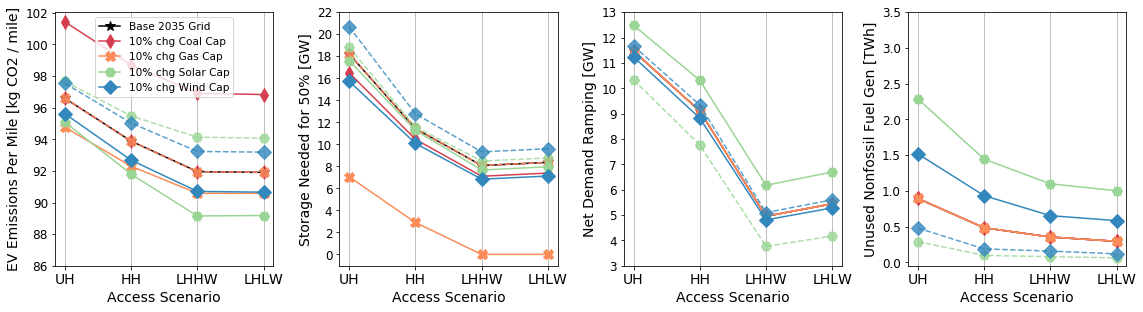

In [13]:
markers = ['d', 'X', 'H', 'D']
colors=['#d53e4f', '#fc8d59', '#99d594', '#3288bd']
# colors = ['#d7191c', '#fdae61', '#abdda4', '#2b83ba']
scaling = [1, (1/1000), (1/1000), (1/1000)*(1/1000)]
fig, axes = plt.subplots(1, 4, figsize=(16, 4.5))
for k, df_plot in enumerate([df_em_100p, df_stor_100p, df_ramp_100p, df_overgen_100p]):
    axes[k].plot(np.arange(0, 4), scaling[k]*df_plot['BaseGrid'].values, '-*', color='k', markersize=10, label='Base 2035 Grid')
    for i, col in enumerate(['Coal', 'Gas', 'Solar', 'Wind']):#df_em.columns):
        axes[k].plot(np.arange(0, 4), scaling[k]*df_plot['More'+col].values, '-'+markers[i], color=colors[i], markersize=10, label='10% chg '+col+' Cap')
        axes[k].plot(np.arange(0, 4), scaling[k]*df_plot['Less'+col].values, '--'+markers[i], color=colors[i], alpha=0.8, markersize=10)
    
for j in range(4):
    axes[j].set_xticks([0, 1, 2, 3])
    axes[j].set_xticklabels(['UH', 'HH', 'LHHW', 'LHLW'], fontsize=14)
# plt.yticks(fontsize=14)
    axes[j].grid(axis='x')
    axes[j].set_xlabel('Access Scenario', fontsize=14)
axes[0].set_ylabel('EV Emissions Per Mile [kg CO2 / mile]', fontsize=14)
axes[0].legend(fontsize=10.5)
axes[0].set_yticks(np.arange(86, 104, 2))
axes[0].set_yticklabels(np.arange(86, 104, 2), fontsize=12)
axes[1].set_yticks(np.arange(0, 23, 2))
axes[1].set_yticklabels(np.arange(0, 23, 2), fontsize=12)
axes[2].set_yticks(np.arange(3, 14))
axes[2].set_yticklabels(np.arange(3, 14), fontsize=12)
axes[3].set_yticks(np.arange(0, 3.6, 0.5))
axes[3].set_yticklabels(np.arange(0, 3.6, 0.5), fontsize=12)
# for i, col in enumerate(['Coal', 'Gas', 'Solar', 'Wind']):
#     plt.plot(np.arange(0, 4), df_stor['More'+col].values, '-'+markers[i], color=colors[i], markersize=10, label='10% chg '+col+' Cap')
#     plt.plot(np.arange(0, 4), df_stor['Less'+col].values, '--'+markers[i], color=colors[i], alpha=0.8, markersize=10)
# plt.xticks([0, 1, 2, 3], ['Universal Home', 'High Home', 'LHHW', 'LHLW'], fontsize=12)
# plt.yticks(fontsize=14)
# plt.grid(axis='x')
axes[1].set_ylabel('Storage Needed for 50% [GW]', fontsize=14)
axes[2].set_ylabel('Net Demand Ramping [GW]', fontsize=14)
axes[3].set_ylabel('Unused Nonfossil Fuel Gen [TWh]', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/figure7_v3_sensitivity_2035_100p.pdf', bbox_inches='tight')
plt.show()

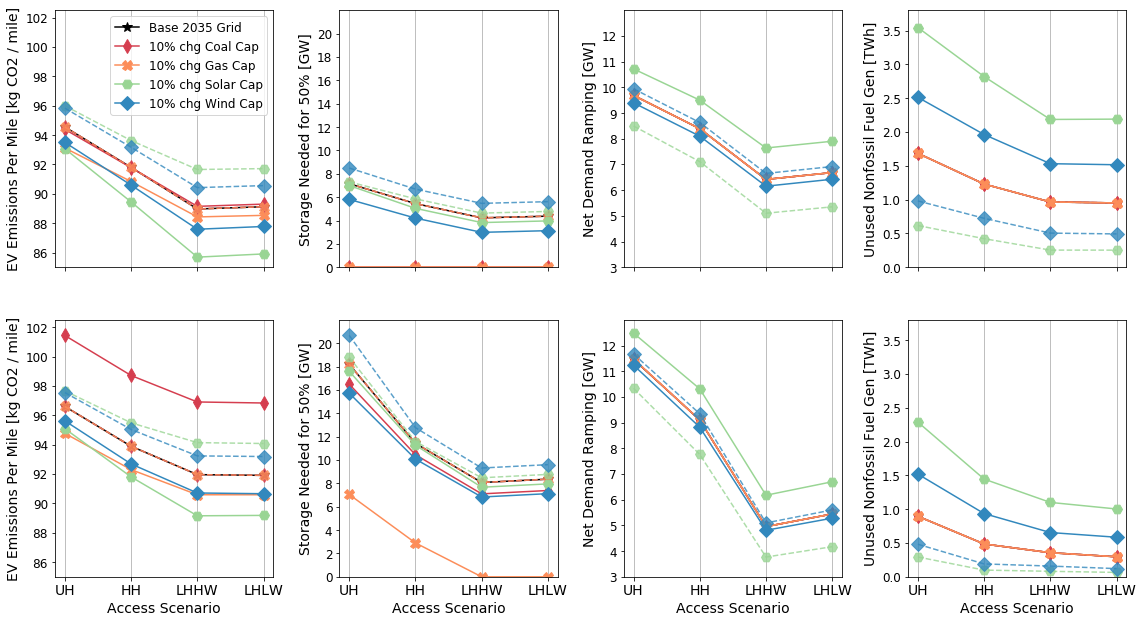

In [17]:
markers = ['d', 'X', 'H', 'D']
colors=['#d53e4f', '#fc8d59', '#99d594', '#3288bd']
# colors = ['#d7191c', '#fdae61', '#abdda4', '#2b83ba']
scaling = [1, (1/1000), (1/1000), (1/1000)*(1/1000)]
fig, axes = plt.subplots(2, 4, figsize=(16, 9), sharex=True)
for k, df_plot in enumerate([df_em, df_stor, df_ramp, df_overgen]):
    axes[0, k].plot(np.arange(0, 4), scaling[k]*df_plot['BaseGrid'].values, '-*', color='k', markersize=10, label='Base 2035 Grid')
    for i, col in enumerate(['Coal', 'Gas', 'Solar', 'Wind']):#df_em.columns):
        axes[0, k].plot(np.arange(0, 4), scaling[k]*df_plot['More'+col].values, '-'+markers[i], color=colors[i], markersize=10, label='10% chg '+col+' Cap')
        axes[0, k].plot(np.arange(0, 4), scaling[k]*df_plot['Less'+col].values, '--'+markers[i], color=colors[i], alpha=0.8, markersize=10)
for k, df_plot in enumerate([df_em_100p, df_stor_100p, df_ramp_100p, df_overgen_100p]):
    axes[1, k].plot(np.arange(0, 4), scaling[k]*df_plot['BaseGrid'].values, '-*', color='k', markersize=10, label='Base 2035 Grid')
    for i, col in enumerate(['Coal', 'Gas', 'Solar', 'Wind']):#df_em.columns):
        axes[1, k].plot(np.arange(0, 4), scaling[k]*df_plot['More'+col].values, '-'+markers[i], color=colors[i], markersize=10, label='10% chg '+col+' Cap')
        axes[1, k].plot(np.arange(0, 4), scaling[k]*df_plot['Less'+col].values, '--'+markers[i], color=colors[i], alpha=0.8, markersize=10)
    
for j in range(4):
    for i in range(2):
        axes[i, j].set_xticks([0, 1, 2, 3])
        axes[i, j].grid(axis='x')

    axes[1, j].set_xticklabels(['UH', 'HH', 'LHHW', 'LHLW'], fontsize=14)
# plt.yticks(fontsize=14)
    axes[1, j].set_xlabel('Access Scenario', fontsize=14)
axes[0, 0].legend(fontsize=12)
for i in range(2):
    axes[i, 0].set_yticks(np.arange(86, 104, 2))
    axes[i, 0].set_yticklabels(np.arange(86, 104, 2), fontsize=12)
    axes[i, 1].set_yticks(np.arange(0, 22, 2))
    axes[i, 1].set_yticklabels(np.arange(0, 22, 2), fontsize=12)
    axes[i, 2].set_yticks(np.arange(3, 13))
    axes[i, 2].set_yticklabels(np.arange(3, 13), fontsize=12)
    axes[i, 3].set_yticks(np.arange(0, 3.6, 0.5))
    axes[i, 3].set_yticklabels(np.arange(0, 3.6, 0.5), fontsize=12)
    axes[i, 0].set_ylim([85, 102.5])
    axes[i, 1].set_ylim([0, 22])
    axes[i, 2].set_ylim([3, 13])
    axes[i, 3].set_ylim([0, 3.8])
# for i, col in enumerate(['Coal', 'Gas', 'Solar', 'Wind']):
#     plt.plot(np.arange(0, 4), df_stor['More'+col].values, '-'+markers[i], color=colors[i], markersize=10, label='10% chg '+col+' Cap')
#     plt.plot(np.arange(0, 4), df_stor['Less'+col].values, '--'+markers[i], color=colors[i], alpha=0.8, markersize=10)
# plt.xticks([0, 1, 2, 3], ['Universal Home', 'High Home', 'LHHW', 'LHLW'], fontsize=12)
# plt.yticks(fontsize=14)
# plt.grid(axis='x')
    axes[i, 0].set_ylabel('EV Emissions Per Mile [kg CO2 / mile]', fontsize=14)
    axes[i, 1].set_ylabel('Storage Needed for 50% [GW]', fontsize=14)
    axes[i, 2].set_ylabel('Net Demand Ramping [GW]', fontsize=14)
    axes[i, 3].set_ylabel('Unused Nonfossil Fuel Gen [TWh]', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/figure7_v3_sensitivity_2035_50and100p.pdf', bbox_inches='tight')
plt.show()